# Importing Libraries:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot

In [5]:
#!pip install yellowbrick

# Loading Dataframe:

In [6]:
dataframe = pd.read_csv(r"C:\Users\Dev Patel\Desktop\Materials\Linear Regression\1000_Companies.csv")
dataframe

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


# Preprocessing Data:

In [7]:
dataframe.index

RangeIndex(start=0, stop=1000, step=1)

In [8]:
len(dataframe)

1000

In [9]:
dataframe.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


**Looking at the table above, we can say that there are no outliers in any column as the mean and median for every column is almost the same.**

### Checking the datatypes of each column:

In [10]:
dataframe.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### Checking if there are any null values:

In [11]:
dataframe.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**There are no null values.**

### Looking at the columns, state column appears to have only 3 values in repetition. To confirm this:

In [12]:
dataframe.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
dataframe.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

**Confirm that there are only 3 values in repetition in State Column.**

### Encoding to State Column to Numbers:

In [14]:
 dataframe.State = dataframe.State.astype('category')

In [15]:
dataframe.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [16]:
dataframe.State = dataframe.State.cat.codes

In [17]:
dataframe.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


# Extracting Features and Target Variable:

In [18]:
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

In [19]:
X.head(10)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [20]:
y.head(10)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

# Checking Linear Relationship:

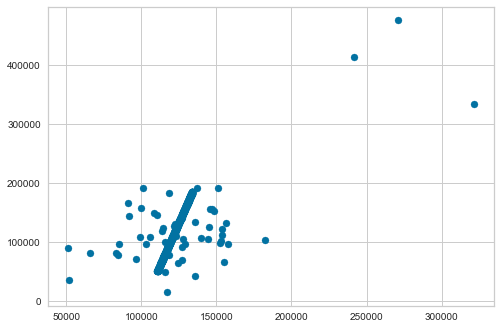

In [21]:
plt.scatter(dataframe.Administration, y)

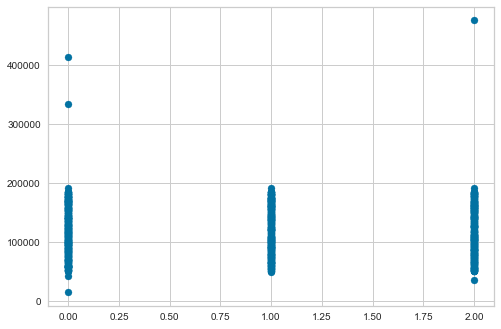

In [22]:
plt.scatter(dataframe.State, y)

In [23]:
dataframe.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

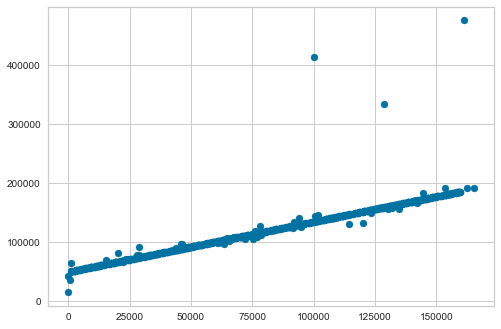

In [24]:
plt.scatter(dataframe['R&D Spend'], y)

**Little Colinearity between R&D Spend and Profit.**

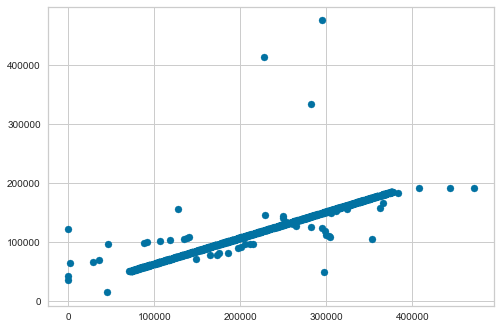

In [25]:
plt.scatter(dataframe['Marketing Spend'], y)

**Little Colinearity between Marketing Spend and Profit.**

# Checking the Correlation between Features and Target:

In [26]:
dataframe.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.582434,0.978407,-0.001360,0.945245
Administration,0.582434,1.000000,0.520465,-0.018386,0.741560
Marketing Spend,0.978407,0.520465,1.000000,-0.001420,0.917270
State,-0.001360,-0.018386,-0.001420,1.000000,-0.005718
Profit,0.945245,0.741560,0.917270,-0.005718,1.000000


<AxesSubplot:>

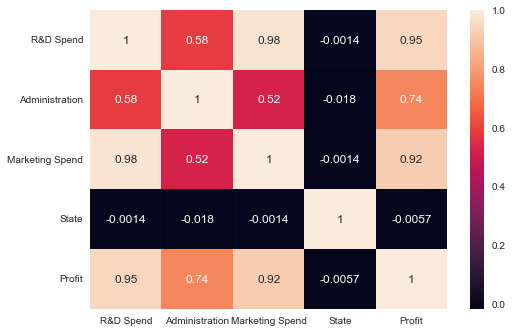

In [27]:
sns.heatmap(dataframe.corr(), annot=True)

# Homoscedasticity Assumption:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

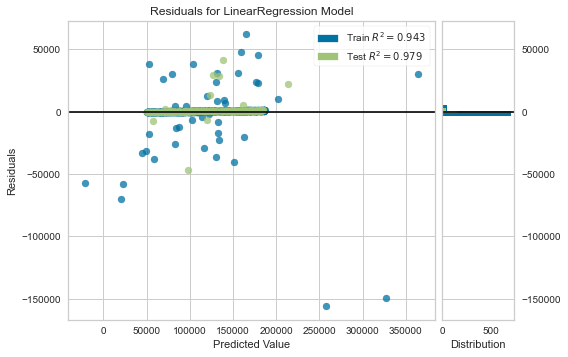

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

**In the above visualisation, the train and test data are randomly distributed => which means it is good to go ahead.**

# Normal distribution of error terms

C:\Users\Dev Patel\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


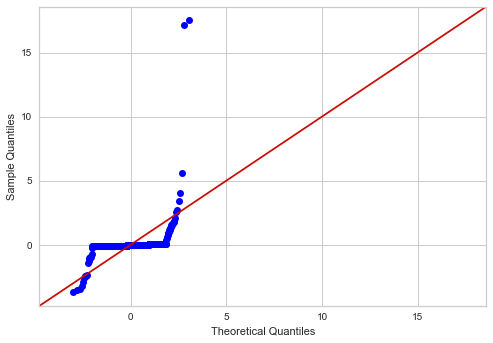

In [30]:
lin_reg = sm.OLS(y_train,X_train).fit()
res = lin_reg.resid
sm.qqplot(res, fit = True, line = '45')
plt.show()

In [31]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.144e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):                        0.00
Time:                        12:12:25   Log-Likelihood:                         -8656.2
No. Observations:                 800   AIC:                                  1.732e+04
Df Residuals:                     796   BIC:                                  1.734e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.9867      0.039     25.081      0.000       0.909       1.064
Administration      0.5337      0.014     36.870      0.000       0.505       0.562
Marketing Spend    -0.1117      0.020     -5.522      0.000      -0.151      -0.072
State            -762.6233    514.819     -1.481      0.139   -1773.187     247.941
==============================================================================
Omnibus:                     1508.998   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1734702.454
Skew:                          13.180   Prob(JB):                         0.00
Kurtosis:                     229.597   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training the Model:

In [32]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

### Fitting the model:

In [33]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)


LinearRegression()

### Predicting the values for Features test values:

In [1]:
y_pred = linearmodel.predict(X_test)

NameError: name 'linearmodel' is not defined

### Evaluating the Model:

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.9792310863532366

### finding coefficients and intercepts

In [37]:
# coefficient 
print(linearmodel.coef_)

[4.97816006e-01 1.08546691e+00 1.05643653e-01 1.59613600e+02]


In [38]:
# intercepts
print(linearmodel.intercept_)

-78458.73743377237


### Final Prediction:

In [39]:
lin_reg.predict([[150000,100000,250000,2],[30000,45000,233333,2]])

array([171922.51147406,  26029.5945345 ])

# Training the Model without R&D Spend:

In [40]:
X1 = dataframe.iloc[:,1:-1]
X1.head(10)

,Administration,Marketing Spend,State
0,136897.80,471784.10,2
1,151377.59,443898.53,0
2,101145.55,407934.54,1
3,118671.85,383199.62,2
4,91391.77,366168.42,1
5,99814.71,362861.36,2
6,147198.87,127716.82,0
7,145530.06,323876.68,1
8,148718.95,311613.29,2
9,108679.17,304981.62,0


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.2)

In [42]:
model = LinearRegression()

model.fit(X1_train,y1_train)

LinearRegression()

In [43]:
y1_pred = model.predict(X1_test)

In [44]:
r2_score(y1_test,y1_pred)

0.9211781183122325

# Training the Model without Marketing Spend:

In [45]:
X2 = X.drop('Marketing Spend', axis=1)

In [46]:
X2.head(10)

,R&D Spend,Administration,State
0,165349.20,136897.80,2
1,162597.70,151377.59,0
2,153441.51,101145.55,1
3,144372.41,118671.85,2
4,142107.34,91391.77,1
5,131876.90,99814.71,2
6,134615.46,147198.87,0
7,130298.13,145530.06,1
8,120542.52,148718.95,2
9,123334.88,108679.17,0


In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2)

In [48]:
model2 = LinearRegression()

model2.fit(X2_train, y2_train)

LinearRegression()

In [49]:
y2_pred = model2.predict(X2_test)

In [50]:
r2_score(y2_test, y2_pred)

0.988851143760152

In [51]:
def LinearRegressor(test_size):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=test_size, random_state = 11)

    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)
    y2_pred = model2.predict(X2_test)
    return r2_score(y2_test, y2_pred)

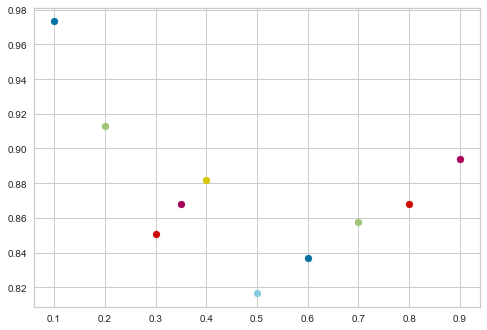

In [52]:
list_ = [0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in list_:
    plt.scatter(i,LinearRegressor(i))

In [53]:
r2_score(y, lin_reg.predict(X))

0.9339935246599163

# Decision Tree Regressor:

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
r2_score(y_test, tree.predict(X_test))

0.9862867264984755

In [56]:
#plt.plot(X, tree.predict(X), color='blue')
#plt.scatter(X, y, color='red')
#plt.title('Decision Tree Regressor')
#plt.ylabel('Profit ->')
#plt.xlabel('Target Variables ->')
#plt.show()

In [57]:
r2_score(y, tree.predict(X))

0.9976690643272643

# Random Forest Regressor:

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
r2_score(y_test, forest.predict(X_test))

0.9955505845654864

In [60]:
r2_score(y, forest.predict(X))

0.995488027301464

# Polynomial Regressor:

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [63]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
r2_score(y_test, poly_model.predict(poly.fit_transform(X_test)))

0.9905687672513792

In [64]:
r2_score(y, poly_model.predict(poly.fit_transform(X)))

0.9722350096001151

# Ridge Regression:

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2_score(y_test, y_pred)

0.9792312362782487

In [67]:
r2_score(y,ridge.predict(X))

0.9496128845755906

# Lasso Regression:

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso()
lasso.fit(X_train, y_train)
r2_score(y_test, lasso.predict(X_test))

0.9792318392627924

In [70]:
r2_score(y,lasso.predict(X))

0.9496129864576205